In [1]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
from urllib.request import urlopen, Request

In [144]:
def img_via_url():
    # Returns a Numpy Array with RGB colors
    URL = "https://upload.wikimedia.org/wikipedia/commons/0/02/Sea_Otter_%28Enhydra_lutris%29_%2825169790524%29_crop.jpg"
    HEADER = {'User-Agent': 'Mozilla/5.0'}
    
    # TODO: Fill out the withstatement below to fetch an image and make it a numpy array in RGB colors
    with urlopen(URL) as req:
        arr =  np.asarray(bytearray(req.read()), dtype=np.uint8)
        BGR_img = cv2.imdecode(arr, -1) 
        
    RGB_img = cv2.cvtColor(BGR_img, cv2.COLOR_BGR2RGB)
        
       
    return RGB_img

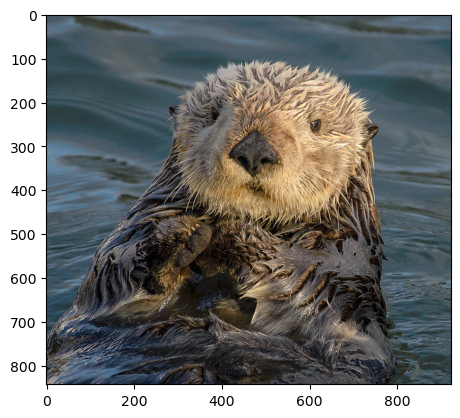

In [145]:
img = img_via_url()

# To show our img
plt.imshow(img)


In [146]:
def copy_and_process(img):
    """This function returns a resized img to 256x256 pixels, its height and its width"""
    img_copy =  img.copy()
    resized_img = cv2.resize(img_copy,(256,256))
    height = resized_img.shape[0]
    width = resized_img.shape[1]
    
    return resized_img, height, width
    


In [147]:
# Try it out!
resized_img, height, width = copy_and_process(img)

print(f"Width of resized img: {width}, height of resized img: {height}")
print(f"First 4 columns in the first row: {resized_img[0][:4]}")

Width of resized img: 256, height of resized img: 256
First 4 columns in the first row: [[ 80  93 110]
 [ 83  97 114]
 [ 89 104 120]
 [ 84 101 116]]


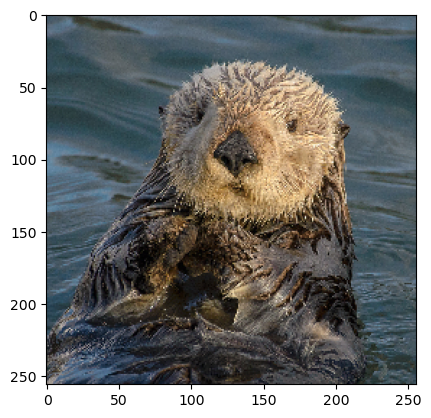

In [148]:
# Lets see how it looks
plt.imshow(resized_img)
copy_img = resized_img.copy()

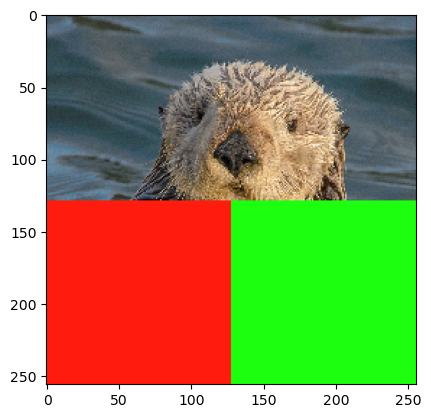

In [151]:
def set_pixel_values():
    # prev_val is a reference to a specific pixels value
    for row in range(width):
        for column in range(height):
            prev_val = resized_img[103][127]

            if column > height/2:
                if row < height/2:
                    resized_img[column][row] = [255,prev_val[1],prev_val[2]]
                    
                else: 
                    resized_img[column][row] = [prev_val[1],255,prev_val[2]]
            
set_pixel_values()
plt.imshow(resized_img)




In [152]:
flattened_img = copy_img.reshape(-1,1)
print(flattened_img.shape)
print(flattened_img)

(196608, 1)
[[ 80]
 [ 93]
 [110]
 ...
 [ 73]
 [ 91]
 [105]]
